In [343]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Reshape
from keras.models import Model,Sequential
#from keras import backend as K


In [344]:
#model
def autoencoder(compress_size):
    input_img = Input(shape=(784,))
    
    #encoder = Sequential()
    #input_img = Input(input_img)
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    #encoded = Dense(32, activation='relu')(encoded)
    encoded_out = Dense(compress_size,)(encoded)
    
    #decoded = Sequential()
    decoded = Dense(64, activation='relu')(encoded_out)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(784, activation='tanh')(decoded)
    
    return input_img,decoded

#IMG_SHAPE = x_train.shape[1:]
#imp = Input(x_train.shape[1:])
encoder,decoder = autoencoder(2) #biggest
autoencoder_model = Model(encoder, decoder)
autoencoder_model.compile(optimizer='adam', loss='mse')

encoder2,decoder2 = autoencoder(8)
autoencoder_model2 = Model(encoder2, decoder2)
autoencoder_model2.compile(optimizer='adam', loss='mse')

encoder3,decoder3 = autoencoder(32) #smallest
autoencoder_model3 = Model(encoder3, decoder3)
autoencoder_model3.compile(optimizer='adam', loss='mse')
#IMG_SHAPE = X.shape[1:]
#encoder, decoder = build_autoencoder(IMG_SHAPE, 32)

#inp = Input(IMG_SHAPE)
#code = encoder(inp)
#reconstruction = decoder(code)

#autoencoder = Model(inp,reconstruction)
#autoencoder.compile(optimizer='adamax', loss='mse')

#print(autoencoder.summary())

In [319]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#print x_train.shape
#print x_test.shape
#x_train = x_train[:6000,:,:,:]
#x_test = x_test[:1000,:,:,:]
autoencoder_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_266 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_267 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_268 (Dense)            (None, 2)                 130       
_________________________________________________________________
dense_269 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_270 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_271 (Dense)            (None, 784)               101136    
Total para

In [320]:
x_train.shape[1:]
a = Reshape((784,))
type(a)

keras.layers.core.Reshape

In [321]:
#from keras.callbacks import TensorBoard

history = autoencoder_model.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=[x_test, x_test])
history2 = autoencoder_model2.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=[x_test, x_test])

history3 = autoencoder_model3.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=[x_test, x_test])




Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0588 - val_loss: 0.0518
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0502 - val_loss: 0.0484
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0474 - val_loss: 0.0462
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0455 - val_loss: 0.0448
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0442 - val_loss: 0.0438
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0434 - val_loss: 0.0432
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0428 - val_loss: 0.0426
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0422 - val_loss: 0.0422
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0417 - val_loss: 0.0418
Epoch

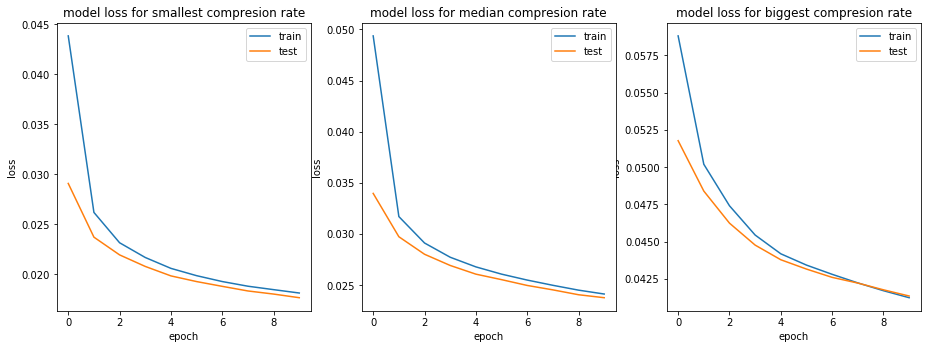

In [326]:
from pylab import *
#acc = autoencoder.evaluate(x_test,x_test)

#classes = autoencoder.predict(x_test)
plt.subplot(133)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for biggest compresion rate')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(132)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss for median compresion rate')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(131)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss for smallest compresion rate')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
subplots_adjust(left=0.0,bottom=0.0,top=1,right=2)
#plt.figure(figsize=(20,5)) 
plt.show()

In [334]:
temp = 0
small = history3.history['val_loss']
for i in range(len(small)):
    temp = temp + small[i]
avg_loss1 = temp /len(small)

temp2 = 0
median = history2.history['val_loss']
for i in range(len(median)):
    temp2 = temp2 + median[i]
avg_loss2 = temp2 / len(median)

temp3 = 0
large = history.history['val_loss']
for i in range(len(large)):
    temp3 = temp3 + large[i]
avg_loss3 = temp3 / len(large)

print('avg_loss for largest compression rate: ',avg_loss3 )
print('avg_loss for median compression rate: ',avg_loss2)
print('avg_loss for smallest compression rate: ',avg_loss1)


avg_loss for largest compression rate:  0.04461457940638065
avg_loss for median compression rate:  0.026761456784307962
avg_loss for smallest compression rate:  0.020754857499152426


from above loss values we can find that the smallest compression rate model has the lowest loss vales, the largest compression rate model has the largest loss value. So small compression rate can get high reconruction accuracy.

In [345]:
decoded_imgs = autoencoder_model.predict(x_test)
#autoencoder_model.evaluate(x_test,x_test)
#check = (decoded_imgs == x_test)
#print ('MNIST test accuracy: %.4f%%' % (sum(check)/len(x_test)))


2 node atuoencoder
original class 0-3:


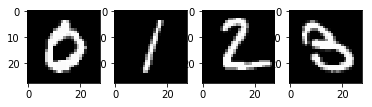

recontructed class 0-3:


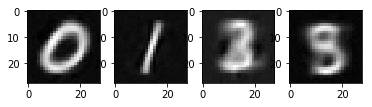

In [342]:
print('2 node atuoencoder')
print('original class 0-3:')
plt.subplot(141)
plt.imshow(x_test[3].reshape(28, 28))
plt.gray()
plt.subplot(142)
plt.imshow(x_test[2].reshape(28, 28))
plt.gray()
plt.subplot(143)
plt.imshow(x_test[1].reshape(28, 28))
plt.gray()
plt.subplot(144)
plt.imshow(x_test[18].reshape(28, 28))
plt.gray()
plt.show()

print('recontructed class 0-3:')
plt.subplot(141)
plt.imshow(decoded_imgs[3].reshape(28, 28))
plt.gray()
plt.subplot(142)
plt.imshow(decoded_imgs[2].reshape(28, 28))
plt.gray()
plt.subplot(143)
plt.imshow(decoded_imgs[1].reshape(28, 28))
plt.gray()
plt.subplot(144)
plt.imshow(decoded_imgs[18].reshape(28, 28))
plt.gray()
plt.show()




# Q2

In [146]:
import numpy as np
import matplotlib.pyplot as plt

#   up  left  stay  right    down
#a {-4   -2     0      2     4}

def tau(s, a):
    if a == 2 or a == -2:
        a = a/2
        if s+a < 16 and s+a >=0:
            return int((s+a))
        else:
            return int((s))
    else:
        if s+a < 16 and s+a >=0:
            return int((s+a))
        else:
            return int((s))
        

def rho(s,a):
    if (s == 1 and a == -2) or (s == 4 and a == -4):
        return 8
    elif (s == 2 and a == 2) or (s == 7 and a == -4):
        return 6
    elif (s == 8 and a == 4) or (s == 13 and a == -2):
        return 1
    elif (s == 11 and a == 4) or (s == 14 and a == 2):
        return -4
    else:
        return 0

def calc_policy(Q):
    policy = np.zeros(16)
    for s in range(0,16):
        action_idx = np.argmax(Q[s,:])
        #policy[s]=2*action_idx-1
        policy[s]=action_idx+1
        policy[0] = policy[3] = policy[12] = policy[15] = 0
    return policy.astype(int)

def idx(a):
    return (int((a+1)/2))

gamma = 0.5

In [147]:
print('--> Policy iteration')

Q=np.zeros([16,4])
policy=calc_policy(Q)
for iter in range(3):
    for s in range(0,16): 
        for a in range(-4,5,2):
            act = np.int(policy[tau(s,a)])
            Q[s,idx(a)]=rho(s,a)+gamma*Q[tau(s,a),idx(act)]
    policy=calc_policy(Q)
    
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))

--> Policy iteration
Q values: 
 [[ 0.          1.5         3.375       1.7109375   0.25        0.
   0.          0.          0.5         0.          0.          0.
   0.         -1.         -1.125      -0.28125   ]
 [ 1.5         3.375       6.84375     0.25        0.          0.
   0.          0.5         0.          0.          0.          0.
  -1.         -1.125      -4.5625     -0.140625  ]
 [ 0.25        0.          0.          0.          0.5         0.
   0.          0.          1.         -1.         -1.125      -4.5625
   0.         -0.5625     -1.125      -0.140625  ]
 [ 0.          1.5         3.375       0.84375     8.          1.6875
   3.421875    6.85546875  0.25        0.          0.          0.
   0.5         0.          0.          0.        ]]
policy: 
 [0 2 2 0 4 4 4 4 3 1 1 1 0 4 4 0]


# Q3

In [168]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


#from scores.score_logger import ScoreLogger

ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995
run_grp = []
score_grp = []
explor_grp = []

class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0])) # Here! Calculate the temaporal differdence
            q_values = self.model.predict(state) #
            q_values[0][action] = q_update 
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
        #self.exploration_rate = 0.2

def cartpole():
    #run_grp = []
    #score_grp = []
    #explor_grp = []
    
    env = gym.make(ENV_NAME)
    score_logger = ScoreLogger(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    run = 0
    solve_num = 0
    while run != 135:
        run += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        run_grp.append(run)
        while True:
            step += 1
            action = dqn_solver.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn_solver.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                print ("Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step))
                #score_logger.add_score(step, run)
                #print(dqn_solver.act())
                score_grp.append(step)
                explor_grp.append(dqn_solver.exploration_rate)
                break
            dqn_solver.experience_replay()
            

#if __name__ == "__main__":
cartpole()
    


Run: 1, exploration: 1.0, score: 19
Run: 2, exploration: 0.8690529955452602, score: 29
Run: 3, exploration: 0.8020760579717637, score: 17
Run: 4, exploration: 0.7514768435208588, score: 14
Run: 5, exploration: 0.6662995813682115, score: 25
Run: 6, exploration: 0.6211445383053219, score: 15
Run: 7, exploration: 0.5819594443402982, score: 14
Run: 8, exploration: 0.5452463540625918, score: 14
Run: 9, exploration: 0.5057535983897912, score: 16
Run: 10, exploration: 0.483444593917636, score: 10
Run: 11, exploration: 0.46211964903917074, score: 10
Run: 12, exploration: 0.42650460709830135, score: 17
Run: 13, exploration: 0.4036245882390106, score: 12
Run: 14, exploration: 0.3800621177172763, score: 13
Run: 15, exploration: 0.3596735257153405, score: 12
Run: 16, exploration: 0.33195389135223546, score: 17
Run: 17, exploration: 0.2943280830920294, score: 25
Run: 18, exploration: 0.2827589419554058, score: 9
Run: 19, exploration: 0.2689348941735696, score: 11
Run: 20, exploration: 0.24696734223

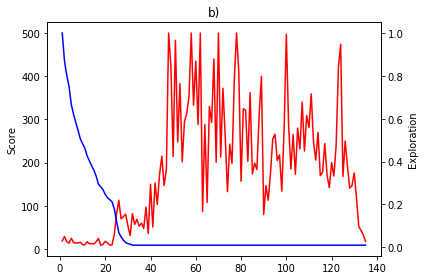

Avg score for all 135 runs:  188.25925925925927
Avg score for 0-60: 120.86666666666666
Avg score for 60-100: 268.875
Avg score for 101-135: 203.42857142857142
Avg score at 80 is:  271.75


In [177]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
#ax1.set_xlabel('# of runs')
ax1.set_ylabel('Score')
ax1.plot(run_grp,score_grp,'r')

ax2 = ax1.twinx()
ax2.set_ylabel('Exploration')  
ax2.plot(run_grp, explor_grp, 'b')
#plt.hlines(0.2,0,130,'g','--')
plt.title('b)')
fig.tight_layout()  
plt.show()

score_all = 0
for i in range(len(score_grp)):
    score_all = score_all + score_grp[i]
    avg_all = score_all / len(score_grp) 
print('Avg score for all ' + str(len(score_grp)) +  ' runs: ',avg_all)

score_1 = 0
score_2 = 0
score_3 = 0
for i in range(0,60):
    score_1 = score_1 + score_grp[i]
avg_1 = score_1 / 60

for i in range(60,100):
    score_2 = score_2 + score_grp[i]
avg_2 = score_2 / 40 

for i in range(101,135):
    score_3 = score_3 + score_grp[i]
avg_3 = score_3 / (135-100) 

print('Avg score for 0-60:', avg_1)
print('Avg score for 60-100:', avg_2)
print('Avg score for 101-135:', avg_3)

score_4 = 0
for i in range(70,90):
    score_4 = score_4 + score_grp[i]
avg_4 = score_4/20
print('Avg score at 80 is: ',avg_4)

I choose the number of steps is 80.And at this point average is 271.75. There are 2 main reasons.  
First, we can see that the exploration rate is constant at 0.01 after 40.  
Second we can see that the average score is the hightest between [60,100], so I think 80 steps is a good point  
between exploring all and getting a good result

In [175]:
GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995
run_grp2 = []
score_grp2 = []
explor_grp2 = []

class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        #if np.random.rand() < self.exploration_rate:
        return random.randrange(self.action_space) # go random!!
        #q_values = self.model.predict(state)
        #return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0])) # Here! Calculate the temaporal differdence
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
        #self.exploration_rate = 0.2

def cartpole2():
    #run_grp = []
    #score_grp = []
    #explor_grp = []
    
    env = gym.make(ENV_NAME)
    #score_logger = ScoreLogger(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    run = 0
    #solve_num = 0
    while run != 90:
        run += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        run_grp2.append(run)
        while True:
            step += 1
            action = dqn_solver.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn_solver.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                print ("Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step))
                #score_logger.add_score(step, run)
                #print(dqn_solver.act())
                score_grp2.append(step)
                explor_grp2.append(dqn_solver.exploration_rate)
                break
            dqn_solver.experience_replay()
            

#if __name__ == "__main__":
    #cartpole()
    
cartpole2()


Run: 1, exploration: 1.0, score: 10
Run: 2, exploration: 0.985074875, score: 13
Run: 3, exploration: 0.8690529955452602, score: 26
Run: 4, exploration: 0.810157377815473, score: 15
Run: 5, exploration: 0.7514768435208588, score: 16
Run: 6, exploration: 0.7040696960536299, score: 14
Run: 7, exploration: 0.6369088258938781, score: 21
Run: 8, exploration: 0.5790496471185967, score: 20
Run: 9, exploration: 0.5371084840724134, score: 16
Run: 10, exploration: 0.46444185833082485, score: 30
Run: 11, exploration: 0.43732904629000013, score: 13
Run: 12, exploration: 0.4117990041127769, score: 13
Run: 13, exploration: 0.39166620452737816, score: 11
Run: 14, exploration: 0.36512303261753626, score: 15
Run: 15, exploration: 0.3237376186352221, score: 25
Run: 16, exploration: 0.2827589419554058, score: 28
Run: 17, exploration: 0.2689348941735696, score: 11
Run: 18, exploration: 0.25578670228422234, score: 11
Run: 19, exploration: 0.23023039494318503, score: 22
Run: 20, exploration: 0.20516038984972

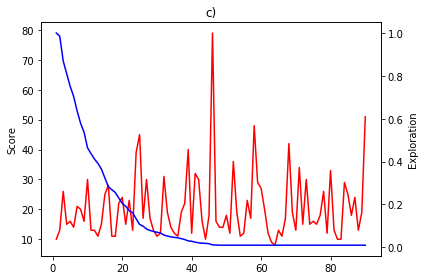

Avg score is  20.444444444444443


In [242]:
fig, ax1 = plt.subplots()
#ax1.set_xlabel('# of runs')
ax1.set_ylabel('Score')
ax1.plot(run_grp2,score_grp2,'r')

ax2 = ax1.twinx()
ax2.set_ylabel('Exploration')  
ax2.plot(run_grp2, explor_grp2, 'b')
#plt.hlines(0.2,0,130,'g','--')
plt.title('c)')

fig.tight_layout()  
plt.show()

score_c = 0
for i in range(len(score_grp2)):
    score_c = score_c + score_grp2[i]
avg_c = score_c / len(score_grp2) 
print('Avg score is ',avg_c)



In [ ]:
#from scores.score_logger import ScoreLogger

ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

#EXPLORATION_MAX = 1.0
EXPLORATION_fixed = 0.2
#EXPLORATION_MIN = 0.01
#EXPLORATION_DECAY = 0.995
run_grp2 = []
score_grp2 = []
explor_grp2 = []

class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_fixed

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0])) # Here! Calculate the temaporal differdence
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        #self.exploration_rate *= EXPLORATION_DECAY
        #self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
        self.exploration_rate = 0.2

def cartpole3():
    #run_grp = []
    #score_grp = []
    #explor_grp = []
    
    env = gym.make(ENV_NAME)
    #score_logger = ScoreLogger(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    run = 0
    while run != 100:
        run += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        run_grp2.append(run)
        while True:
            step += 1
            
            action = dqn_solver.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn_solver.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                #print ("Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step))
                #score_logger.add_score(step, run)
                score_grp2.append(step)
                explor_grp2.append(dqn_solver.exploration_rate)
                break
            dqn_solver.experience_replay()
            

#if __name__ == "__main__":
cartpole3()
    



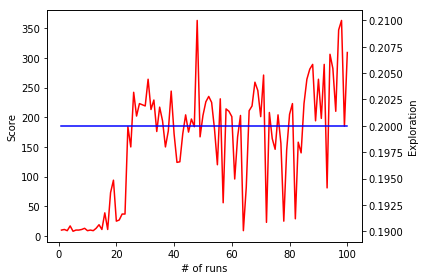

Avg score for 100 runs:  156.76


In [116]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('# of runs')
ax1.set_ylabel('Score')
ax1.plot(run_grp2,score_grp2,'r')

ax2 = ax1.twinx()
ax2.set_ylabel('Exploration')  
ax2.plot(run_grp2, explor_grp2, 'b')
#plt.hlines(0.2,0,130,'g','--')

fig.tight_layout()  
plt.show()


score_fix_explor = 0
for i in range(len(score_grp2)):
    score_fix_explor = score_fix_explor + score_grp2[i]
    avg_fix_explor = score_fix_explor / len(score_grp2) 
print('Avg score for ' + str(len(score_grp2)) +  ' runs: ',avg_fix_explor)

so from the figure above, the average score is about 156 when the exploration rate is fixed at 0.2

In [142]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


from scores.score_logger import ScoreLogger

ENV_NAME = "CartPole-v1"

GAMMA = 0.95
LEARNING_RATE = 0.001

MEMORY_SIZE = 1000000
BATCH_SIZE = 20

EXPLORATION_MAX = 1.0
EXPLORATION_MIN = 0.01
EXPLORATION_DECAY = 0.995


class DQNSolver:

    def __init__(self, observation_space, action_space):
        self.exploration_rate = EXPLORATION_MAX

        self.action_space = action_space
        self.memory = deque(maxlen=MEMORY_SIZE)

        self.model = Sequential()
        self.model.add(Dense(24, input_shape=(observation_space,), activation="relu"))
        self.model.add(Dense(24, activation="relu"))
        self.model.add(Dense(self.action_space, activation="linear"))
        self.model.compile(loss="mse", optimizer=Adam(lr=LEARNING_RATE))

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def experience_replay(self):
        if len(self.memory) < BATCH_SIZE:
            return
        batch = random.sample(self.memory, BATCH_SIZE)
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))
            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)


def cartpole():
    env = gym.make(ENV_NAME)
    score_logger = ScoreLogger(ENV_NAME)
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n
    dqn_solver = DQNSolver(observation_space, action_space)
    run = 0
    while True:
        run += 1
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        while True:
            step += 1
            #env.render()
            action = dqn_solver.act(state)
            state_next, reward, terminal, info = env.step(action)
            reward = reward if not terminal else -reward
            state_next = np.reshape(state_next, [1, observation_space])
            dqn_solver.remember(state, action, reward, state_next, terminal)
            state = state_next
            if terminal:
                print ("Run: " + str(run) + ", exploration: " + str(dqn_solver.exploration_rate) + ", score: " + str(step))
                score_logger.add_score(step, run)
                break
            dqn_solver.experience_replay()


if __name__ == "__main__":
    cartpole()

Run: 1, exploration: 0.8955869907338783, score: 42
Scores: (min: 42, avg: 42, max: 42)

Run: 2, exploration: 0.8265651079747222, score: 17
Scores: (min: 17, avg: 29.5, max: 42)



/Users/Xiaoze Xia/Desktop/4155/A4/scores/score_logger.py:77: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(np.array(trend_x), np.array(y[1:]), 1)


Run: 3, exploration: 0.6832098777212641, score: 39
Scores: (min: 17, avg: 32.666666666666664, max: 42)

Run: 4, exploration: 0.6211445383053219, score: 20
Scores: (min: 17, avg: 29.5, max: 42)

Run: 5, exploration: 0.5790496471185967, score: 15
Scores: (min: 15, avg: 26.6, max: 42)

Run: 6, exploration: 0.5562889678716474, score: 9
Scores: (min: 9, avg: 23.666666666666668, max: 42)

Run: 7, exploration: 0.5344229416520513, score: 9
Scores: (min: 9, avg: 21.571428571428573, max: 42)

Run: 8, exploration: 0.4932355662165453, score: 17
Scores: (min: 9, avg: 21, max: 42)

Run: 9, exploration: 0.46211964903917074, score: 14
Scores: (min: 9, avg: 20.22222222222222, max: 42)

Run: 10, exploration: 0.43952667968844233, score: 11
Scores: (min: 9, avg: 19.3, max: 42)

Run: 11, exploration: 0.4180382776616619, score: 11
Scores: (min: 9, avg: 18.545454545454547, max: 42)

Run: 12, exploration: 0.3976004408064698, score: 11
Scores: (min: 9, avg: 17.916666666666668, max: 42)

Run: 13, exploration: 0

KeyboardInterrupt: 